# BIOINF 575 - Group Project - Kegg Pathway Overlap
#### Authors:
* Ryan Rebernick
* Elysia Chou
* Mahnoor Gondal
* Tusharika Rastogi


### Questions to be answered by each group member
##### Question 1
What was your biggest challenge in this project? (regarding writing code and not only)

##### Question 2
What did you learn while working on this project? (regarding writing code and not only)

##### Question 3
If you had more time on the project what other question(s) would you like to answer? (at least one question is required)

### Ryan Rebernick

#### Question 1.
The greatest challenge was learning to use pandas dataframes 
early on in the course. I worked on the first chunk of the project 
and this was right after we learned about dataframes and their 
functions. I had a lot of trouble merging appropriately and this 
took me the most time. 


#### Question 2.
I learned how to read files into python, load them as pandas 
dataframes, and merge them. Additionally, I learned about 
computing pertinent summaries, heading files, and ensuring my 
data was correct.

#### Question 3.
I would like to take expression data from different cancer types 
and see how many pathways are expressed in each cancer type 
and what the differences in expressed pathways are between 
cancers.
_____________________________________________________________________________________________________________________________________________________

### Elysia Chou

#### Question 1.
My biggest challenge was going through my colleagues' code to figure out what they had done before me, and how I could use the data structures they had created to perform the step I was assigned. Not being well-versed in Pandas dataframes myself, parsing through specific lines of code would raise questions if I didn't run the code myself and inspect its elements. </br><br>
I also realized that using the `os` library might have also made things go more smoothly when handing off parts of the code to colleagues; I made a string `path` that could be modified according to who was running the code and in what directory they wanted to put the results, because I kept having to change that manually for the code to run on my machine. 

#### Question 2.
I learned a lot about the possibilities of using Pandas as well as different coding styles and strategies I could adapt to improve my own coding practice. Moreover, I learned the value of every team member using GitHub to have a central space to store all the files created throughout the project.

#### Question 3.
KEGG has many extensive databases and probably has more information on each pathway and gene we used in this project. It would be interesting to see what role the top 3 genes in our project play in the pathways they are a part of. Furthermore, when modeling certain pathways to study drug responses like Dr. Stacey Finley presented during one of the DCMB seminars, it would be interesting to see if including certain genes/proteins in the model would be redundant since they appear in the exact same number of pathways.

_____________________________________________________________________________________________________________________________________________________

### Mahnoor Gonadal

#### Question 1
For me, I was working on tasks 3 and 4 and the biggest challenge that I faced while working on them was merging the two dataframe in python. I was using the merge function for combining information from two dataframes and instead of converging on a unique column the code was exhaustively generating combinations and making billions of rows instead of million combinations. After debugging for a couple of hours I decided to draw what I was trying to do on a piece of paper and see if that is what the code was also doing. Once I conceptually saw the way merge command was working I realized that I needed to first make the data unique and then combine data on unique gene ids. When I updated the code according to my new understanding of the dataframe, everything worked as it was supposed to!  


#### Question 2
I learned three main things, the (1) first was how to work with multiple people and collaborate and rely on one another for completing the project, and transfer code the (2) second thing was regarding how to merge dataframes, and work with the merge function. The (3) third thing I learned was how to add in checks for the results to make sure its correct, for example, we needed to place some additional checks such; removes lines where pathway_ID1 == pathway_ID2 and pathway_ID2 == pathway_ID1 so this will give you the same rank/gene so we removed this duplication and pathway_ID1 == pathway_ID2. This taught me that sanity checks are very important.


#### Question 3
I think it would have been interesting to also link the genes together to understand if the common genes were also connected to each other and we could also have constructed a gene regulatory network (GRN) which can show us the level of that association. Additionally, We could also have incorporated gene expression data from different tissues which would have made clustering easier based on common genes. We could have then generated plots such as PCA or t-SNE and we would have been able to see some good cluster formation based on common genes in different tissues. 

_____________________________________________________________________________________________________________________________________________________

### Tusharika Rastogi

##### Question 1
The challenge was to figure out why I could see the intersection between only 2 sets but mentioning that the function is plotting the venn diagram between the 3 sets.The venn diagram gave the labels for all the 3 genes (Gene 1, Gene 2, Gene 3), but I could see the venn diagram as it would have been had there been only 2 sets. I could see only one intersection. This issue was solved when I used the intersection function on the sets and came to know that 2 of the 3 sets were identical and had the same pathways(elements) in  them. The sets (Gene_2 and Gene3) being identical is the reason that the venn diagram came out to be the one as is in the python notebook. Furthermore, the identical sets were overlapped and then intersected with the remaining set.

##### Question 2
When I was stuck on the interpretation of the output, I learnt that one should use the basic fucnctions too when using the advanced ones. Furthermore, when plotting a dataset, one should check its conditions separately to understand what the ouput will be. Checking the plotting conditions separately will help in easy interpretation of the plot.

##### Question 3
If I had more time on the project, I would have found out the names of the pathways that were common in the top 3 genes and would have extracted the description of the pathway and its KEGG pathway id and entry number so that one can look out for more information for a particular pathway. 

_____________________________________________________________________________________________________________________________________________________

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Create a path string to adjust at the beginning, depending on whose machine the code is running.
path = './'

## 1. Map/merge the information by PATHWAY_ID and GENE_ID. 

#### First we read in the data and store in dataframes for easy access.

In [3]:

# Read the pathway names
pathway_pinfo = pd.read_table('http://rest.kegg.jp/list/pathway/hsa', header=None)
pathway_pinfo.columns = ['PATHWAY_ID', 'PATHWAY_INFO']
print(pathway_pinfo.head())
print(np.shape(pathway_pinfo))

# Read the gene-pathway
geneid_pathway = pd.read_table('http://rest.kegg.jp/link/pathway/hsa', header=None)
geneid_pathway.columns = ['GENE_ID', 'PATHWAY_ID']
print(geneid_pathway.head())
print(np.shape(geneid_pathway))

# Read the pathway names
geneid_ginfo = pd.read_table('http://rest.kegg.jp/list/hsa', header=None)
geneid_ginfo.columns = ['GENE_ID', 'GENE_INFO']
print(geneid_ginfo.head())
print(np.shape(geneid_ginfo))


      PATHWAY_ID                                       PATHWAY_INFO
0  path:hsa00010  Glycolysis / Gluconeogenesis - Homo sapiens (h...
1  path:hsa00020   Citrate cycle (TCA cycle) - Homo sapiens (human)
2  path:hsa00030   Pentose phosphate pathway - Homo sapiens (human)
3  path:hsa00040  Pentose and glucuronate interconversions - Hom...
4  path:hsa00051  Fructose and mannose metabolism - Homo sapiens...
(345, 2)
     GENE_ID     PATHWAY_ID
0  hsa:10327  path:hsa00010
1    hsa:124  path:hsa00010
2    hsa:125  path:hsa00010
3    hsa:126  path:hsa00010
4    hsa:127  path:hsa00010
(35380, 2)
         GENE_ID                                          GENE_INFO
0  hsa:100423038                  MIR466, hsa-mir-466; microRNA 466
1  hsa:100616498                   MIR378E, mir-378e; microRNA 378e
2     hsa:442913  MIR376C, MIR368, MIRN368, MIRN376C, hsa-mir-36...
3     hsa:574461                   MIR520E, MIRN520E; microRNA 520e
4  hsa:100616159                             MIR4779; microRNA 4

#### Next we need to merge the information by pathway ids and gene ids

UPDATE: The gene IDs with NaN gene info are not present in the original KEGG file.

Note that in merging, some genes did not have values in the geneid_ginfo file. These were left as NaN. I have shown them for reference.

In [4]:

# combine the pathway information and the gene ids
merged = pd.merge(pathway_pinfo, geneid_pathway, on = 'PATHWAY_ID', how = 'outer')

# add the gene info
merged = pd.merge(merged, geneid_ginfo, on = 'GENE_ID', how = 'left')

# sort and look at the result
merged = merged.sort_values(by = 'PATHWAY_ID')
#print(merged.head())
#print(np.shape(merged))

# View the NA genes
print("Gene info with NaN values:")
print(merged[merged['GENE_INFO'].isnull()])



Gene info with NaN values:
Empty DataFrame
Columns: [PATHWAY_ID, PATHWAY_INFO, GENE_ID, GENE_INFO]
Index: []


#### Save this file for future use

In [5]:

merged.to_csv(path + '2.1_merged_genes_pathways.csv', sep = ',', mode = 'w', index=False)
    

## 2. Compute the number of overlapping genes between every 2 pathways.

Our goal is to create a dataframe with 4 columns: pathway 1, pathway 2, the number of overlapping genes, and which genes overlap.
To do this we will:

* create a dictionary of each pathway to a set of its genes.
* Then we will loop through each and compare it to the remaining pathways.
* The output of this will be exported as a .csv file

#### First we read in our data that we previously generated
If running separate scripts or picking up where you left off.

In [6]:
# Run this is you are starting from this step
merged = pd.read_table(path + '2.1_merged_genes_pathways.csv', sep=',')
merged = merged.rename(columns={'pathway_id': 'PATHWAY_ID', 'pathway_info': 'PATHWAY_INFO', 'gene_id': 'GENE_ID', 'gene_info': 'GENE_INFO'})
# merged.head()

#### Next we will create dictionaries that store the pathways and a set of each pathways respective genes.


In [7]:

# all the unique pathways
unique_pathways = np.unique(merged['PATHWAY_ID'])
print(unique_pathways[:2])

# dictionary to store each pathwyas genes
pathway_genes = {}

# get the genes for each pathway and store in dictionary
for pw in unique_pathways:
    
    # rows of df corresponding to current pathway
    cur_pw = merged[merged.PATHWAY_ID == pw]
    # the genes from the current rows
    cur_genes = set(cur_pw.GENE_ID)
    # add to dictionary
    pathway_genes.update({pw:cur_genes})

# look at the first dicionary entry
print('\n')
print(list(pathway_genes.items())[:1])
print()

['path:hsa00010' 'path:hsa00020']


[('path:hsa00010', {'hsa:3939', 'hsa:2203', 'hsa:5214', 'hsa:2023', 'hsa:5224', 'hsa:5232', 'hsa:125', 'hsa:83440', 'hsa:5162', 'hsa:2645', 'hsa:84532', 'hsa:2026', 'hsa:222', 'hsa:2821', 'hsa:3099', 'hsa:219', 'hsa:3098', 'hsa:160287', 'hsa:669', 'hsa:501', 'hsa:5213', 'hsa:80201', 'hsa:5236', 'hsa:92483', 'hsa:387712', 'hsa:5211', 'hsa:128', 'hsa:5230', 'hsa:224', 'hsa:2538', 'hsa:226', 'hsa:5223', 'hsa:131', 'hsa:8789', 'hsa:92579', 'hsa:127', 'hsa:126', 'hsa:5106', 'hsa:5315', 'hsa:230', 'hsa:5161', 'hsa:1738', 'hsa:217', 'hsa:441531', 'hsa:5105', 'hsa:3101', 'hsa:1737', 'hsa:229', 'hsa:130589', 'hsa:5313', 'hsa:26330', 'hsa:221', 'hsa:3948', 'hsa:57818', 'hsa:130', 'hsa:3945', 'hsa:7167', 'hsa:2597', 'hsa:5160', 'hsa:2027', 'hsa:223', 'hsa:10327', 'hsa:55902', 'hsa:55276', 'hsa:124', 'hsa:9562', 'hsa:218'})]



#### Next we will loop through each pathway and crossref the overlapping genes with all the other pathways. The number of crossovers will be stored in a dataframe.

In [8]:

# lists to store values; will be converted into dataframe at the end
pw_1_list = list()
pw_2_list = list()
gene_overlap_list = list()
number_overlap_list = list()

# for each pathway in the unique pathways
for n in range(0, len(unique_pathways)):
    
    # first pathway
    pw_1 = unique_pathways[n]
    # genes from first pathway
    pw_1_genes = pathway_genes.get(pw_1)
    
    # loop through other pathway combinations,
    # such that no pair of pathways shows up twice,
    # nor do we take pairs of which each element is the same pathway.
    for nn in range(n+1, len(unique_pathways)):
        
        # second pathway
        pw_2 = unique_pathways[nn]
        # genes from first pathway
        pw_2_genes = pathway_genes.get(pw_2)
    
        # compute overlapping genes
        overlaps = pw_1_genes.intersection(pw_2_genes)
        num_overalps = len(overlaps)
    
        # add to lists
        pw_1_list.append(pw_1)
        pw_2_list.append(pw_2)
        gene_overlap_list.append(overlaps)
        number_overlap_list.append(num_overalps)

        
# create dataframe from lists
pathway_gene_overlaps = pd.DataFrame(list(zip(pw_1_list, pw_2_list, number_overlap_list, gene_overlap_list)), 
                                     columns = ['PATHWAY_ID1', 'PATHWAY_ID2', 'NUM_OVERLAPPING_GENES', 'OVERLAPPING_GENES'])

# look at the first entries
print(np.shape(pathway_gene_overlaps))
pathway_gene_overlaps[:10]

(59340, 4)


,PATHWAY_ID1,PATHWAY_ID2,NUM_OVERLAPPING_GENES,OVERLAPPING_GENES
0,path:hsa00010,path:hsa00020,7,"{hsa:5106, hsa:5161, hsa:1738, hsa:5162, hsa:5..."
1,path:hsa00010,path:hsa00030,11,"{hsa:5236, hsa:5213, hsa:2203, hsa:230, hsa:52..."
2,path:hsa00010,path:hsa00040,1,{hsa:10327}
3,path:hsa00010,path:hsa00051,13,"{hsa:5213, hsa:2203, hsa:80201, hsa:230, hsa:5..."
4,path:hsa00010,path:hsa00052,14,"{hsa:5236, hsa:5213, hsa:80201, hsa:5214, hsa:..."
5,path:hsa00010,path:hsa00053,6,"{hsa:501, hsa:224, hsa:217, hsa:223, hsa:10327..."
6,path:hsa00010,path:hsa00061,0,{}
7,path:hsa00010,path:hsa00062,0,{}
8,path:hsa00010,path:hsa00071,12,"{hsa:126, hsa:501, hsa:130, hsa:224, hsa:125, ..."
9,path:hsa00010,path:hsa00100,0,{}


#### Save this file for future use

In [9]:
pathway_gene_overlaps.to_csv(path + '2.2_overlapping_genes.csv', sep = ',', mode = 'w', index=False)

## 3. Save the result to a file KEGG_crosstalk.csv 
This file should be saved with the following columns: PATHWAY_ID1, PATHWAY_NAME1, PATHWAY_ID2, PATHWAY_NAME2. Order the results descending by the number of overlapping genes where PATHWAY_ID1 is different than PATHWAY_ID2.

In [10]:
# Run if starting from here
# pathway_pinfo = merged[['PATHWAY_ID', 'PATHWAY_INFO']]
# pathway_pinfo = pathway_info.drop_duplicates()

In [11]:
#Add pathway information for pathway ID1
# Using original pathway_pinfo obtained from KEGG (see step 1)
Combined_pathways1 = pd.merge(pathway_gene_overlaps,
                 pathway_pinfo,
                 left_on='PATHWAY_ID1',
                 right_on='PATHWAY_ID')

# look at the first entries
print(np.shape(Combined_pathways1))
# DELETE LATER Combined_pathways1[346:700]

(59340, 6)


In [12]:
#Add pathway information for pathway ID2 and rearranging the dataframe into a new dataframe with updated information
Combined_pathways2 = pd.merge(Combined_pathways1,
                 pathway_pinfo,
                 left_on = "PATHWAY_ID2",
                 right_on = "PATHWAY_ID" )
#print(Combined_pathways2.head())

In [13]:
# DELETE LATER
print(Combined_pathways2.head())

     PATHWAY_ID1    PATHWAY_ID2  NUM_OVERLAPPING_GENES  \
0  path:hsa00010  path:hsa00020                      7   
1  path:hsa00010  path:hsa00030                     11   
2  path:hsa00020  path:hsa00030                      0   
3  path:hsa00010  path:hsa00040                      1   
4  path:hsa00020  path:hsa00040                      0   

                                   OVERLAPPING_GENES   PATHWAY_ID_x  \
0  {hsa:5106, hsa:5161, hsa:1738, hsa:5162, hsa:5...  path:hsa00010   
1  {hsa:5236, hsa:5213, hsa:2203, hsa:230, hsa:52...  path:hsa00010   
2                                                 {}  path:hsa00020   
3                                        {hsa:10327}  path:hsa00010   
4                                                 {}  path:hsa00020   

                                      PATHWAY_INFO_x   PATHWAY_ID_y  \
0  Glycolysis / Gluconeogenesis - Homo sapiens (h...  path:hsa00020   
1  Glycolysis / Gluconeogenesis - Homo sapiens (h...  path:hsa00030   
2   Citrate

In [14]:
del Combined_pathways2["PATHWAY_ID_x"],Combined_pathways2["PATHWAY_ID_y"]
Combined_pathways2 = Combined_pathways2.rename(columns={'PATHWAY_INFO_x': 'PATHWAY_NAME1', 'PATHWAY_INFO_y': 'PATHWAY_NAME2'})
Combined_pathways2 = Combined_pathways2[["PATHWAY_ID1", "PATHWAY_NAME1", "PATHWAY_ID2", "PATHWAY_NAME2", "NUM_OVERLAPPING_GENES", "OVERLAPPING_GENES"]]
Updated_data = Combined_pathways2.sort_values(by=['NUM_OVERLAPPING_GENES'], ascending=False)

# look at the first entries
print(np.shape(Updated_data))
Updated_data[:10]

(59340, 6)


,PATHWAY_ID1,PATHWAY_NAME1,PATHWAY_ID2,PATHWAY_NAME2,NUM_OVERLAPPING_GENES,OVERLAPPING_GENES
35772,path:hsa05010,Alzheimer disease - Homo sapiens (human),path:hsa05022,Pathways of neurodegeneration - multiple disea...,333,"{hsa:7474, hsa:27123, hsa:7473, hsa:8324, hsa:..."
35774,path:hsa05014,Amyotrophic lateral sclerosis - Homo sapiens (...,path:hsa05022,Pathways of neurodegeneration - multiple disea...,294,"{hsa:126328, hsa:55626, hsa:9861, hsa:81027, h..."
35775,path:hsa05016,Huntington disease - Homo sapiens (human),path:hsa05022,Pathways of neurodegeneration - multiple disea...,251,"{hsa:126328, hsa:55626, hsa:9861, hsa:81027, h..."
35773,path:hsa05012,Parkinson disease - Homo sapiens (human),path:hsa05022,Pathways of neurodegeneration - multiple disea...,228,"{hsa:7316, hsa:6263, hsa:126328, hsa:9861, hsa..."
34979,path:hsa05014,Amyotrophic lateral sclerosis - Homo sapiens (...,path:hsa05016,Huntington disease - Homo sapiens (human),224,"{hsa:126328, hsa:55626, hsa:9861, hsa:81027, h..."
35777,path:hsa05020,Prion disease - Homo sapiens (human),path:hsa05022,Pathways of neurodegeneration - multiple disea...,220,"{hsa:6263, hsa:126328, hsa:9861, hsa:81027, hs..."
35506,path:hsa05010,Alzheimer disease - Homo sapiens (human),path:hsa05020,Prion disease - Homo sapiens (human),214,"{hsa:5290, hsa:6263, hsa:126328, hsa:9861, hsa..."
34452,path:hsa05010,Alzheimer disease - Homo sapiens (human),path:hsa05012,Parkinson disease - Homo sapiens (human),208,"{hsa:6263, hsa:126328, hsa:4891, hsa:9861, hsa..."
34714,path:hsa05010,Alzheimer disease - Homo sapiens (human),path:hsa05014,Amyotrophic lateral sclerosis - Homo sapiens (...,206,"{hsa:126328, hsa:55626, hsa:9861, hsa:81027, h..."
34977,path:hsa05010,Alzheimer disease - Homo sapiens (human),path:hsa05016,Huntington disease - Homo sapiens (human),202,"{hsa:126328, hsa:55626, hsa:9861, hsa:81027, h..."


In [15]:
#Save the result to a file KEGG_crosstalk.csv with the following columns: 
#PATHWAY_ID1, PATHWAY_NAME1, PATHWAY_ID2, PATHWAY_NAME2. 

Updated_data.to_csv(path + '2.3_KEGG_crosstalk.csv')

## 4. Compute a rank of the genes based on how many pathways they appear on and save it to a file.

In [16]:
#Function to extract gene_description
def get_description(info):
    if type(info) == float:
        return ""
    return info.split(";")[-1]
    

In [17]:
#Apply function to extract gene description and add it to the data
merged['gene_description'] = merged['GENE_INFO'].apply(get_description)

In [18]:
#Apply gene_id for genes without any pathway assigned i.e NaN in description
merged.gene_description[(merged.gene_description == "")] = merged.GENE_ID[(merged.gene_description == "")]

# look at the first entries
print(np.shape(merged))
merged[:10]

(35380, 5)


,PATHWAY_ID,PATHWAY_INFO,GENE_ID,GENE_INFO,gene_description
0,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:10327,"AKR1A1, ALDR1, ALR, ARM, DD3, HEL-S-6; aldo-ke...",aldo-keto reductase family 1 member A1
1,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:3945,"LDHB, HEL-S-281, LDH-B, LDH-H, LDHBD, TRG-5; l...",lactate dehydrogenase B
2,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:3948,"LDHC, CT32, LDH3, LDHX; lactate dehydrogenase C",lactate dehydrogenase C
3,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:441531,"PGAM4, PGAM-B, PGAM1, PGAM3, dJ1000K24.1; phos...",phosphoglycerate mutase family member 4
4,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:501,"ALDH7A1, ATQ1, EPD, PDE; aldehyde dehydrogenas...",aldehyde dehydrogenase 7 family member A1
5,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:5106,"PCK2, PEPCK, PEPCK-M, PEPCK2; phosphoenolpyruv...","phosphoenolpyruvate carboxykinase 2, mitochon..."
6,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:5160,"PDHA1, PDHA, PDHAD, PDHCE1A, PHE1A; pyruvate d...",pyruvate dehydrogenase E1 subunit alpha 1
7,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:5161,"PDHA2, PDHAL; pyruvate dehydrogenase E1 subuni...",pyruvate dehydrogenase E1 subunit alpha 2
8,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:5162,"PDHB, PDHBD, PDHE1-B, PDHE1B, PHE1B; pyruvate ...",pyruvate dehydrogenase E1 subunit beta
9,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:5211,"PFKL, ATP-PFK, PFK-B, PFK-L; phosphofructokina...","phosphofructokinase, liver type"


In [19]:
#Compute rank of the genes based on how many pathways they appear in
gene_rank = merged.groupby(['gene_description'])['PATHWAY_ID'].count().sort_values(ascending=False)
gene_rank = pd.DataFrame(gene_rank)
gene_rank['gene_rank'] = gene_rank['PATHWAY_ID']

del gene_rank['PATHWAY_ID']

# look at the first entries
print(np.shape(gene_rank))
gene_rank[:10]

# The resulting dataframe suggests that the order of the genes was largely sorted on reverse 
# alphabetical order as well, which is why in step 5, the top 3 genes include the 
# phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit delta rather than
# the other two subunits alpha or beta.

(8110, 1)


,gene_rank
gene_description,
mitogen-activated protein kinase 3,117
mitogen-activated protein kinase 1,117
"phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit delta",106
"phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit alpha",106
"phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit beta",106
phosphoinositide-3-kinase regulatory subunit 3,103
phosphoinositide-3-kinase regulatory subunit 2,103
phosphoinositide-3-kinase regulatory subunit 1,103
AKT serine/threonine kinase 3,100


In [20]:
#Save the result to a file
gene_rank.to_csv(path + '2.4_Gene_Rank.csv')

## 5. Retrieve a set of the pathways the top 3 genes appear on.

In [21]:
# Run this if you start from this step:
# gene_rank = pd.read_table(path + '2.4_Gene_Rank.csv', sep=',')

In [24]:
# Top n genes to extract
n = 3
top_genes = gene_rank.iloc[:n,]
# The 3rd gene might change depending on the way the gene_rank dataframe was sorted.
top_genes

,gene_rank
gene_description,
mitogen-activated protein kinase 3,117
mitogen-activated protein kinase 1,117
"phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit delta",106


In [25]:
# We verified that the gene description is unique to the gene ID, at least in the case of our top n genes
top_genes_pinfo = merged[merged.gene_description.isin(top_genes.index)]
top_genes_pinfo

,PATHWAY_ID,PATHWAY_INFO,GENE_ID,GENE_INFO,gene_description
1841,path:hsa00562,Inositol phosphate metabolism - Homo sapiens (...,hsa:5293,"PIK3CD, APDS, IMD14, IMD14A, IMD14B, P110DELTA...","phosphatidylinositol-4,5-bisphosphate 3-kinas..."
3197,path:hsa01100,Metabolic pathways - Homo sapiens (human),hsa:5293,"PIK3CD, APDS, IMD14, IMD14A, IMD14B, P110DELTA...","phosphatidylinositol-4,5-bisphosphate 3-kinas..."
5002,path:hsa01521,EGFR tyrosine kinase inhibitor resistance - Ho...,hsa:5595,"MAPK3, ERK-1, ERK1, ERT2, HS44KDAP, HUMKER1A, ...",mitogen-activated protein kinase 3
5003,path:hsa01521,EGFR tyrosine kinase inhibitor resistance - Ho...,hsa:5594,"MAPK1, ERK, ERK-2, ERK2, ERT1, MAPK2, NS13, P4...",mitogen-activated protein kinase 1
5012,path:hsa01521,EGFR tyrosine kinase inhibitor resistance - Ho...,hsa:5293,"PIK3CD, APDS, IMD14, IMD14A, IMD14B, P110DELTA...","phosphatidylinositol-4,5-bisphosphate 3-kinas..."
...,...,...,...,...,...
34764,path:hsa05415,Diabetic cardiomyopathy - Homo sapiens (human),hsa:5293,"PIK3CD, APDS, IMD14, IMD14A, IMD14B, P110DELTA...","phosphatidylinositol-4,5-bisphosphate 3-kinas..."
35049,path:hsa05417,Lipid and atherosclerosis - Homo sapiens (human),hsa:5595,"MAPK3, ERK-1, ERK1, ERT2, HS44KDAP, HUMKER1A, ...",mitogen-activated protein kinase 3
35059,path:hsa05417,Lipid and atherosclerosis - Homo sapiens (human),hsa:5293,"PIK3CD, APDS, IMD14, IMD14A, IMD14B, P110DELTA...","phosphatidylinositol-4,5-bisphosphate 3-kinas..."
35063,path:hsa05417,Lipid and atherosclerosis - Homo sapiens (human),hsa:5594,"MAPK1, ERK, ERK-2, ERK2, ERT1, MAPK2, NS13, P4...",mitogen-activated protein kinase 1


In [26]:
# Create a dictionary with n elements,
# where the keys are the gene IDs and the values are the sets of pathways.
dict_geneid_pw = dict()
top_gene_ids = top_genes_pinfo.GENE_ID.unique()
print(f'Top {n} ranked genes:')
for gene in top_gene_ids:
    # Could use merged dataframe or geneid_pathway dataframe from source
    dict_geneid_pw[gene] = set(top_genes_pinfo[top_genes_pinfo.GENE_ID == gene].PATHWAY_ID)
    # For description purposes
    g_description = top_genes_pinfo[top_genes_pinfo['GENE_ID'] == gene].gene_description.unique()[0]
    print(f'{gene} --{g_description}: {len(dict_geneid_pw[gene])} pathways')
    print(f'including but not limited to {list(dict_geneid_pw[gene])[:10]}\n')

    

Top 3 ranked genes:
hsa:5293 -- phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit delta: 106 pathways
including but not limited to ['path:hsa05131', 'path:hsa05230', 'path:hsa04210', 'path:hsa05100', 'path:hsa05170', 'path:hsa05415', 'path:hsa05200', 'path:hsa04960', 'path:hsa04068', 'path:hsa05206']

hsa:5595 -- mitogen-activated protein kinase 3: 117 pathways
including but not limited to ['path:hsa05131', 'path:hsa04114', 'path:hsa05230', 'path:hsa04210', 'path:hsa05022', 'path:hsa05170', 'path:hsa05200', 'path:hsa04928', 'path:hsa04960', 'path:hsa04068']

hsa:5594 -- mitogen-activated protein kinase 1: 117 pathways
including but not limited to ['path:hsa05131', 'path:hsa04114', 'path:hsa05230', 'path:hsa04210', 'path:hsa05022', 'path:hsa05170', 'path:hsa05200', 'path:hsa04928', 'path:hsa04960', 'path:hsa04068']



In [27]:
# Save to tab-delimited file
with open(path + '2.5_top_genes_pathways.txt', 'w') as file5:
    for key in dict_geneid_pw.keys():
        file5.write(key)
        file5.write('\t')
        file5.write(str(dict_geneid_pw[key]))
        file5.write('\n')
    

## 6. Compute and display a Venn diagram for number of overlapping pathways for the top 3 genes.

In [28]:
#Importing matplotlib package and useful libraries to plot our dataset as a venn diagram of top 3 genes
#Venn3 is being imported because it is used to create a venn diagram between 3 sets

import matplotlib as mlp
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt


In [29]:
#help(venn3)

In [30]:
top_gene_ids
#type(top_gene_ids)

array(['hsa:5293', 'hsa:5595', 'hsa:5594'], dtype=object)

In [31]:
n = len(top_gene_ids)
n

3

In [32]:
#Extracting the value (pathways) of the 3 keys (gene_id of the top 3 gene) from the dictionary of geneid_pw(gene_id and pathways)

Gene_1 = set(dict_geneid_pw.get(top_gene_ids[0]))
Gene_2 = set(dict_geneid_pw.get(top_gene_ids[1]))
Gene_3 = set(dict_geneid_pw.get(top_gene_ids[2]))

C:\Users\trastogi\Anaconda3\lib\site-packages\matplotlib_venn\_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


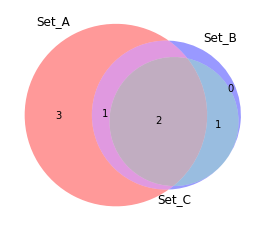

In [33]:
#Using the venn3 function on a simple dataset to know how to create a venn diagram
#Added more similar values in the sets so as to determine how will be the venn diagram if the two sets are almost identical
#Two almost identical sets overlap each other when a venn diagram is plotted
#This is clearly visible in the venn diagram below
#Set B and Set C are almost identical (with only one element being different in Set B (it has one more element than Set C))
#Thus Set C is seen to be inside Set B (overlapping is seen between Set B and Set C)

from matplotlib_venn import venn3
from matplotlib import pyplot as plt


# Venn3
set_a = set(['A', 'B', 'C', 'E', 'F', 'G'])
set_b = set(['B', 'C', 'D', 'E'])
set_c = set(['C', 'D', 'E'])

venn3(subsets=[set_a, set_b, set_c],
      set_labels=['Set_A', 'Set_B', 'Set_C'],
      set_colors=['red', 'blue', 'green'])

plt.show()

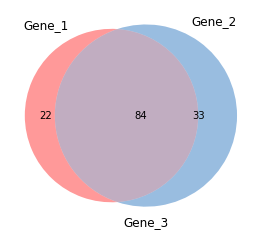

In [34]:
#Plotting a venn diagram between pathways of the top 3 genes from the dataset

venn3(subsets=[Gene_1, Gene_2, Gene_3],
     set_labels=["Gene_1", "Gene_2", "Gene_3"],
     set_colors=['red', 'blue', 'green'])

plt.show()

In [35]:
#Sets Gene_2 and Gene_3 are completely overlapped. This is because the two sets are identical and have the same pathways(elements) in them.
#This is evaluated and confirmed using the intersection() function between Gene_2 and Gene_3

In [36]:
Gene_3.intersection(Gene_2) == Gene_3

True

In [37]:
#This tells the number of pathways which are common in Gene_1, Gene_2 and Gene_3
#The evaluation tells that there are 84 pathways which are common in the top 3 genes, i.e. "84 overlapping pathways in the top 3 genes"

len(Gene_3.intersection(Gene_2).intersection(Gene_1))

84